# Imports

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
from PIL import Image
from PIL import ImageFilter
import matplotlib as mpl
from PyPDF2 import PdfFileWriter, PdfFileReader
import io
from reportlab.pdfgen import canvas
from reportlab.lib.pagesizes import letter,A4
%matplotlib inline

ImportError: No module named pandas

# GST RFD 11

In [18]:
DICT={
    "name": "FORM-GST-RFD-11.pdf",
    "zones":
    {
        "GSTIN": [286,730,516,711],
        "Name": [287,709,515,693],
        "TypeBond": [325,687,351,674],
        "TypeLetter": [471,687,498,672],
        "BondDetails": [182,669,515,652],
        "SrNoRow1": [71,605,111,589],
        "RefRow1": [115,604,287,589],
        "DateRow1": [291,604,354,588],
        "AmtRow1": [358,605,422,586],
        "BranchRow1": [425,605,516,587],
        "SrRow2": [71,586,112,567],
        "RefRow2": [115,586,287,568],
        "DateRow2": [290,584,354,568],
        "AmtRow2": [358,584,422,568],
        "BranchRow2": [424,585,515,569],
        "SrNoRow3": [70,566,113,549],
        "RefRow3": [115,566,287,550],
        "DateRow3": [290,566,354,549],
        "AmtRow3": [357,565,422,549],
        "BranchRow3": [425,565,514,549],
        "NameSign": [359,359,589,344],
        "Status": [416,341,590,331],
        "Date": [354,326,415,315],
    }
}

In [19]:
DICT

{'name': 'FORM-GST-RFD-11.pdf',
 'zones': {'GSTIN': [286, 730, 516, 711],
  'Name': [287, 709, 515, 693],
  'TypeBond': [325, 687, 351, 674],
  'TypeLetter': [471, 687, 498, 672],
  'BondDetails': [182, 669, 515, 652],
  'SrNoRow1': [71, 605, 111, 589],
  'RefRow1': [115, 604, 287, 589],
  'DateRow1': [291, 604, 354, 588],
  'AmtRow1': [358, 605, 422, 586],
  'BranchRow1': [425, 605, 516, 587],
  'SrRow2': [71, 586, 112, 567],
  'RefRow2': [115, 586, 287, 568],
  'DateRow2': [290, 584, 354, 568],
  'AmtRow2': [358, 584, 422, 568],
  'BranchRow2': [424, 585, 515, 569],
  'SrNoRow3': [70, 566, 113, 549],
  'RefRow3': [115, 566, 287, 550],
  'DateRow3': [290, 566, 354, 549],
  'AmtRow3': [357, 565, 422, 549],
  'BranchRow3': [425, 565, 514, 549],
  'NameSign': [359, 359, 589, 344],
  'Status': [416, 341, 590, 331],
  'Date': [354, 326, 415, 315]}}

# Filling

In [20]:
DICT

{'name': 'FORM-GST-RFD-11.pdf',
 'zones': {'GSTIN': [286, 730, 516, 711],
  'Name': [287, 709, 515, 693],
  'TypeBond': [325, 687, 351, 674],
  'TypeLetter': [471, 687, 498, 672],
  'BondDetails': [182, 669, 515, 652],
  'SrNoRow1': [71, 605, 111, 589],
  'RefRow1': [115, 604, 287, 589],
  'DateRow1': [291, 604, 354, 588],
  'AmtRow1': [358, 605, 422, 586],
  'BranchRow1': [425, 605, 516, 587],
  'SrRow2': [71, 586, 112, 567],
  'RefRow2': [115, 586, 287, 568],
  'DateRow2': [290, 584, 354, 568],
  'AmtRow2': [358, 584, 422, 568],
  'BranchRow2': [424, 585, 515, 569],
  'SrNoRow3': [70, 566, 113, 549],
  'RefRow3': [115, 566, 287, 550],
  'DateRow3': [290, 566, 354, 549],
  'AmtRow3': [357, 565, 422, 549],
  'BranchRow3': [425, 565, 514, 549],
  'NameSign': [359, 359, 589, 344],
  'Status': [416, 341, 590, 331],
  'Date': [354, 326, 415, 315]}}

In [21]:
zones = DICT['zones']

In [22]:
DICT

{'name': 'FORM-GST-RFD-11.pdf',
 'zones': {'GSTIN': [286, 730, 516, 711],
  'Name': [287, 709, 515, 693],
  'TypeBond': [325, 687, 351, 674],
  'TypeLetter': [471, 687, 498, 672],
  'BondDetails': [182, 669, 515, 652],
  'SrNoRow1': [71, 605, 111, 589],
  'RefRow1': [115, 604, 287, 589],
  'DateRow1': [291, 604, 354, 588],
  'AmtRow1': [358, 605, 422, 586],
  'BranchRow1': [425, 605, 516, 587],
  'SrRow2': [71, 586, 112, 567],
  'RefRow2': [115, 586, 287, 568],
  'DateRow2': [290, 584, 354, 568],
  'AmtRow2': [358, 584, 422, 568],
  'BranchRow2': [424, 585, 515, 569],
  'SrNoRow3': [70, 566, 113, 549],
  'RefRow3': [115, 566, 287, 550],
  'DateRow3': [290, 566, 354, 549],
  'AmtRow3': [357, 565, 422, 549],
  'BranchRow3': [425, 565, 514, 549],
  'NameSign': [359, 359, 589, 344],
  'Status': [416, 341, 590, 331],
  'Date': [354, 326, 415, 315]}}

In [26]:
zones

{'GSTIN': [286, 730, 516, 711],
 'Name': [287, 709, 515, 693],
 'TypeBond': [325, 687, 351, 674],
 'TypeLetter': [471, 687, 498, 672],
 'BondDetails': [182, 669, 515, 652],
 'SrNoRow1': [71, 605, 111, 589],
 'RefRow1': [115, 604, 287, 589],
 'DateRow1': [291, 604, 354, 588],
 'AmtRow1': [358, 605, 422, 586],
 'BranchRow1': [425, 605, 516, 587],
 'SrRow2': [71, 586, 112, 567],
 'RefRow2': [115, 586, 287, 568],
 'DateRow2': [290, 584, 354, 568],
 'AmtRow2': [358, 584, 422, 568],
 'BranchRow2': [424, 585, 515, 569],
 'SrNoRow3': [70, 566, 113, 549],
 'RefRow3': [115, 566, 287, 550],
 'DateRow3': [290, 566, 354, 549],
 'AmtRow3': [357, 565, 422, 549],
 'BranchRow3': [425, 565, 514, 549],
 'NameSign': [359, 359, 589, 344],
 'Status': [416, 341, 590, 331],
 'Date': [354, 326, 415, 315]}

In [23]:
286+18, 730+10

(304, 740)

# Basic code

In [32]:
x,y  = 286, 730 # setting coords

In [33]:
packet = io.BytesIO()
# create a new PDF with Reportlab
can = canvas.Canvas(packet)
can.drawString(x,y, "234567890")
can.save()


In [34]:
A4 # A4 size

(595.2755905511812, 841.8897637795277)

In [35]:
#move to the beginning of the StringIO buffer
packet.seek(0)
new_pdf = PdfFileReader(packet)

In [36]:
# read your existing PDF
existing_pdf = PdfFileReader(open("FORM-GST-RFD-11.pdf", "rb"))
output = PdfFileWriter()

In [37]:
# add the "watermark" (which is the new pdf) on the existing page
page = existing_pdf.getPage(0)
page.mergePage(new_pdf.getPage(0))
output.addPage(page)

In [38]:
# finally, write "output" to a real file
outputStream = open("destination.pdf", "wb")
output.write(outputStream)
outputStream.close()

In [39]:
DICT

{'name': 'FORM-GST-RFD-11.pdf',
 'zones': {'GSTIN': [286, 730, 516, 711],
  'Name': [287, 709, 515, 693],
  'TypeBond': [325, 687, 351, 674],
  'TypeLetter': [471, 687, 498, 672],
  'BondDetails': [182, 669, 515, 652],
  'SrNoRow1': [71, 605, 111, 589],
  'RefRow1': [115, 604, 287, 589],
  'DateRow1': [291, 604, 354, 588],
  'AmtRow1': [358, 605, 422, 586],
  'BranchRow1': [425, 605, 516, 587],
  'SrRow2': [71, 586, 112, 567],
  'RefRow2': [115, 586, 287, 568],
  'DateRow2': [290, 584, 354, 568],
  'AmtRow2': [358, 584, 422, 568],
  'BranchRow2': [424, 585, 515, 569],
  'SrNoRow3': [70, 566, 113, 549],
  'RefRow3': [115, 566, 287, 550],
  'DateRow3': [290, 566, 354, 549],
  'AmtRow3': [357, 565, 422, 549],
  'BranchRow3': [425, 565, 514, 549],
  'NameSign': [359, 359, 589, 344],
  'Status': [416, 341, 590, 331],
  'Date': [354, 326, 415, 315]}}

# Code implementation for all of DICT

In [40]:
packet_new = io.BytesIO()
can_new = canvas.Canvas(packet_new)

for i in DICT['zones']:
    #print(i)
    x1,y1 = DICT['zones'][i][0],DICT['zones'][i][1]-57
    #print(x1,y1)
    # create a new PDF with Reportlab
    can_new.drawString(x1, y1, "def")
can_new.save()


    

In [41]:
#move to the beginning of the StringIO buffer
packet_new.seek(0)
new_pdf = PdfFileReader(packet_new)

In [42]:
# read your existing PDF
existing_pdf = PdfFileReader(open("wrongpos.pdf", "rb"))
output = PdfFileWriter()

In [43]:
# add the "watermark" (which is the new pdf) on the existing page
page = existing_pdf.getPage(0)
page.mergePage(new_pdf.getPage(0))
output.addPage(page)

In [44]:
# finally, write "output" to a real file
outputStream = open("destination.pdf", "wb")
output.write(outputStream)
outputStream.close()

# Text out of readable pdf

In [302]:
from pdfminer.pdfdocument import PDFDocument
from pdfminer.pdfpage import PDFPage
from pdfminer.pdfparser import PDFParser
from pdfminer.pdfinterp import PDFResourceManager, PDFPageInterpreter
from pdfminer.converter import PDFPageAggregator
from pdfminer.layout import LAParams, LTTextBox, LTTextLine, LTFigure


def parse_layout(layout):
    """Function to recursively parse the layout tree."""
    for lt_obj in layout:
        print(lt_obj.__class__.__name__)
        print(lt_obj.bbox)
        if isinstance(lt_obj, LTTextBox):
            print(lt_obj.get_text())
        elif isinstance(lt_obj, LTFigure):
            parse_layout(lt_obj)  # Recursive


fp = open('FORM-GST-RFD-11.pdf', 'rb')
parser = PDFParser(fp)
doc = PDFDocument(parser)

rsrcmgr = PDFResourceManager()
laparams = LAParams()
device = PDFPageAggregator(rsrcmgr, laparams=laparams)
interpreter = PDFPageInterpreter(rsrcmgr, device)
for page in PDFPage.create_pages(doc):
    interpreter.process_page(page)
    layout = device.get_result()
    parse_layout(layout)

LTTextBoxHorizontal
(271.13, 759.48864, 363.04, 768.38292)
FORM GST RFD-11 

LTTextBoxHorizontal
(286.37, 747.9486400000001, 347.8, 757.01224)
[See rule 96A] 

LTTextBoxHorizontal
(135.5, 725.62864, 460.27, 734.52292)
Furnishing of bond or Letter of Undertaking for export of goods or services 

LTTextBoxHorizontal
(77.904, 710.62864, 124.19, 720.03088)
1.  GSTIN 

LTTextBoxHorizontal
(77.904, 689.50864, 118.67, 698.91088)
2.  Name 

LTTextBoxHorizontal
(77.904, 668.38864, 254.54000000000002, 677.79088)
3.  Indicate the type of document furnished 

LTTextBoxHorizontal
(77.904, 647.50864, 196.70000000000002, 656.91088)
4.  Details of bond furnished 

LTTextBoxHorizontal
(305.95, 710.62864, 308.44, 719.68228)
 

LTTextBoxHorizontal
(305.95, 689.50864, 308.44, 698.56228)
 

LTTextBoxHorizontal
(305.95, 668.38864, 308.44, 677.44228)
 

LTTextBoxHorizontal
(314.47, 663.8286400000001, 341.44, 672.88228)
Bond: 

LTTextBoxHorizontal
(347.95, 663.8286400000001, 350.44, 672.88228)
 

LTTextBoxHor

In [303]:

fp = open('FORM-GST-RFD-11.pdf', 'rb')
parser = PDFParser(fp)
doc = PDFDocument(parser)



In [304]:
rsrcmgr = PDFResourceManager()
laparams = LAParams()
device = PDFPageAggregator(rsrcmgr, laparams=laparams)
interpreter = PDFPageInterpreter(rsrcmgr, device)


In [305]:
for page in PDFPage.create_pages(doc):
    interpreter.process_page(page)
    layout = device.get_result()
    print(layout)
    #parse_layout(layout)
    break

<LTPage(1) 0.000,0.000,595.920,842.640 rotate=0>


In [306]:
PDFPage.create_pages(doc)

<generator object PDFPage.create_pages at 0x7fa82f48ca98>

In [307]:
for page in PDFPage.create_pages(doc):
    #print(page)
    print(interpreter.process_page(page))
    break

None


In [308]:
def parse_layout(layout):
    """Function to recursively parse the layout tree."""
    for lt_obj in layout:
        print(lt_obj.__class__.__name__)
        print(lt_obj.bbox)
        if isinstance(lt_obj, LTTextBox):
            print(lt_obj.get_text())
        elif isinstance(lt_obj, LTFigure):
            parse_layout(lt_obj)  # Recursive

In [309]:
for lt_obj in layout:
#     print(lt_obj.__class__.__name__)
#     print(lt_obj.bbox)
    if isinstance(lt_obj, LTTextBox):
#         print(lt_obj.get_text())
        for i in lt_obj:
            print(i)
            print('\n')
    elif isinstance(lt_obj, LTFigure):
        parse_layout(lt_obj)  # Recursive    

<LTTextLineHorizontal 271.130,759.489,363.040,768.383 'FORM GST RFD-11 \n'>


<LTTextLineHorizontal 286.370,747.949,347.800,757.012 '[See rule 96A] \n'>


<LTTextLineHorizontal 135.500,725.629,460.270,734.523 'Furnishing of bond or Letter of Undertaking for export of goods or services \n'>


<LTTextLineHorizontal 77.904,710.629,124.190,720.031 '1.  GSTIN \n'>


<LTTextLineHorizontal 77.904,689.509,118.670,698.911 '2.  Name \n'>


<LTTextLineHorizontal 77.904,668.389,254.540,677.791 '3.  Indicate the type of document furnished \n'>


<LTTextLineHorizontal 77.904,647.509,196.700,656.911 '4.  Details of bond furnished \n'>


<LTTextLineHorizontal 305.950,710.629,308.440,719.682 ' \n'>


<LTTextLineHorizontal 305.950,689.509,308.440,698.562 ' \n'>


<LTTextLineHorizontal 305.950,668.389,308.440,677.442 ' \n'>


<LTTextLineHorizontal 314.470,663.829,341.440,672.882 'Bond: \n'>


<LTTextLineHorizontal 347.950,663.829,350.440,672.882 ' \n'>


<LTTextLineHorizontal 381.910,663.829,467.470,672.

In [277]:
x,y = 311.39219999999995, 670.9703

In [45]:
import pdfquery

In [46]:
pdf = pdfquery.PDFQuery("FORM-GST-RFD-11.pdf")

In [47]:
pdf.load()

In [48]:
label = pdf.pq('LTTextLineHorizontal:contains("GSTIN")')

In [49]:
x1,y1,x2,y2 = float(label.attr('x0')),float(label.attr('y0')), float(label.attr('x1')), float(label.attr('y1'))

In [50]:
x1,y1,x2,y2

(77.904, 710.629, 124.19, 720.031)

In [51]:
img = cv2.imread("rfd11-0.png")

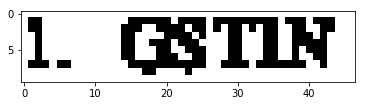

In [52]:
plt.imshow(img[843-721:843-711,78:125])